## Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.shape

(1000, 8)

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [16]:
cols = df.columns
for col in cols:
    print(col)
    print(df[col].value_counts())
    print()

gender
female    518
male      482
Name: gender, dtype: int64

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

lunch
standard        645
free/reduced    355
Name: lunch, dtype: int64

test preparation course
none         642
completed    358
Name: test preparation course, dtype: int64

math score
65    36
62    35
59    32
69    32
73    27
      ..
22     1
19     1
18     1
8      1
0      1
Name: math score, Length: 81, dtype: int64

reading score
72    34
74    33
64    32
73    30
67    30
      ..
32     1
28     1
26     1
23     1
17     1
Name: reading score, Length: 72, dtype: int64

writing score
74    35
70    33
68    31
73    28
62    27
      ..
23     1
22     1
19

## Preprocessing the dataset

In [17]:
df['parental level of education'] = df['parental level of education'].replace({'some high school':'high school', 'associate\'s degree':'bachelor\'s degree', 'some college':'master\'s degree'})
df['parental level of education'].value_counts()

high school          375
bachelor's degree    340
master's degree      285
Name: parental level of education, dtype: int64

In [36]:
df['lunch'] = df['lunch'].replace({'standard':1, 'free/reduced': 0})
df['lunch'].value_counts()
df['standard lunch'] = df['lunch']
df.drop(columns= ['lunch'], inplace = True)
df['standard lunch'].value_counts()

1    645
0    355
Name: standard lunch, dtype: int64

In [37]:
df['test preparation course'] = df['test preparation course'].replace({'none':0, 'completed': 1})
df['test preparation course'].value_counts()
df['prepared for test'] = df['test preparation course']
df.drop(columns=['test preparation course'], inplace = True)
df['prepared for test'].value_counts()

0    642
1    358
Name: prepared for test, dtype: int64

## Creation of new attributes

In [ ]:
##Not Needed

## Exploratory data analysis

<AxesSubplot:xlabel='math score', ylabel='Density'>

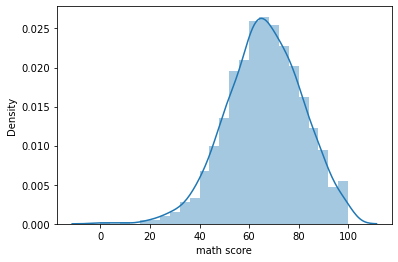

In [34]:
sns.distplot(df['math score'])

## Correlation Matrix

<AxesSubplot:>

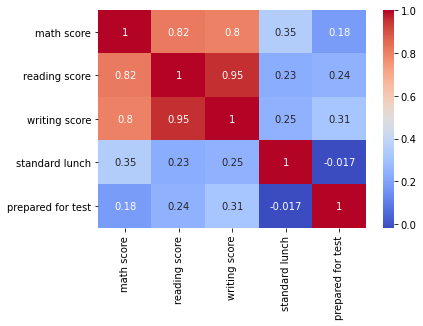

In [38]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [39]:
df.head()

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,standard lunch,prepared for test
0,female,group B,bachelor's degree,72,72,74,1,0
1,female,group C,master's degree,69,90,88,1,1
2,female,group B,master's degree,90,95,93,1,0
3,male,group A,bachelor's degree,47,57,44,0,0
4,male,group C,master's degree,76,78,75,1,0


## Onehot Encoding

In [59]:
df=pd.get_dummies(df, columns=['race/ethnicity', 'parental level of education', 'gender'])
df.head()

,math score,reading score,writing score,standard lunch,prepared for test,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,gender_female,gender_male
0,72,72,74,1,0,0,1,0,0,0,1,0,0,1,0
1,69,90,88,1,1,0,0,1,0,0,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,1,1,0
3,47,57,44,0,0,1,0,0,0,0,1,0,0,0,1
4,76,78,75,1,0,0,0,1,0,0,0,0,1,0,1


<AxesSubplot:>

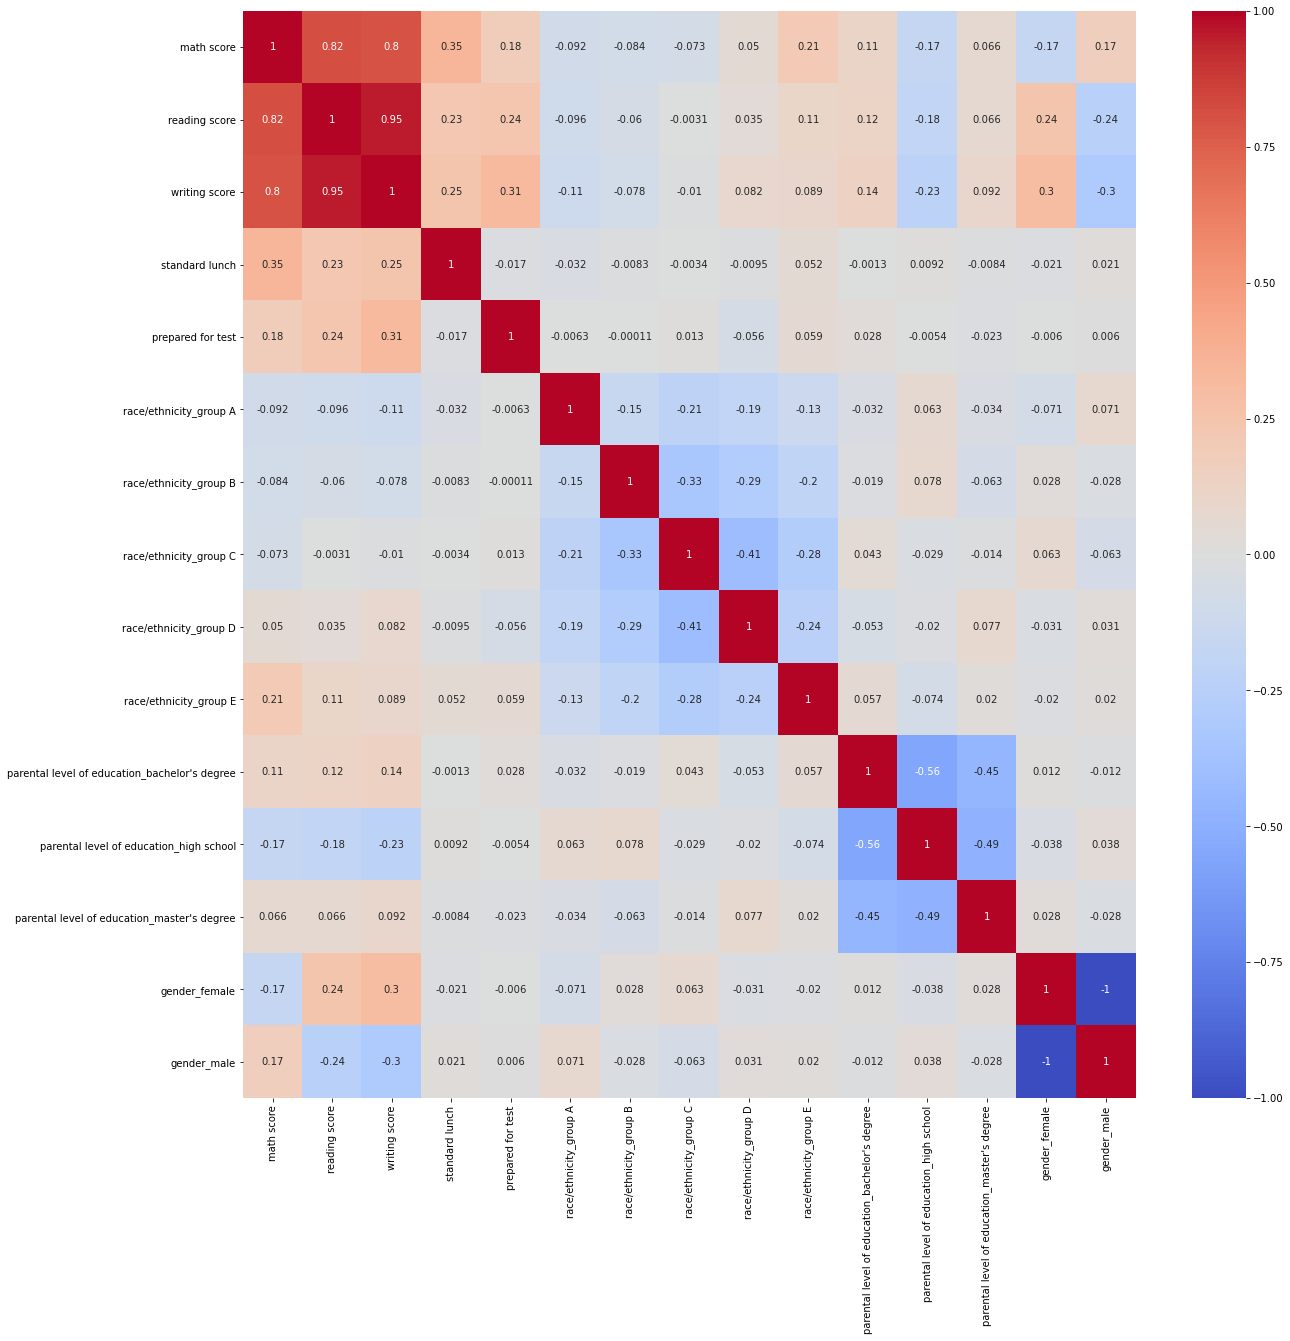

In [61]:
corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Input Split

In [83]:
from sklearn.model_selection import train_test_split


X = df.drop(columns = ['math score'])
y = df['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [84]:
X_train.shape

(800, 14)

In [85]:
y_train.shape

(800,)

## Model Training

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

Model Report
MSE: 28.633323032965308
CV Score: 29.219512920070276


<AxesSubplot:title={'center':'Model Coefficients'}>

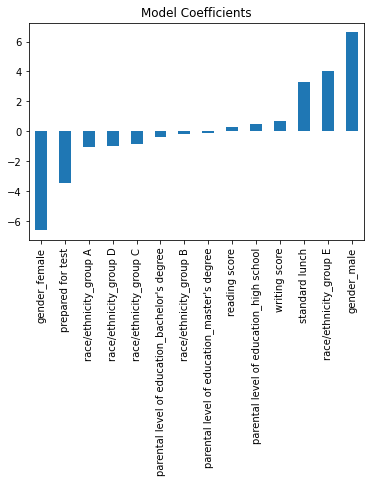

In [92]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 58.69233563821418
CV Score: 59.47477425012033


<AxesSubplot:title={'center':'Model Coefficients'}>

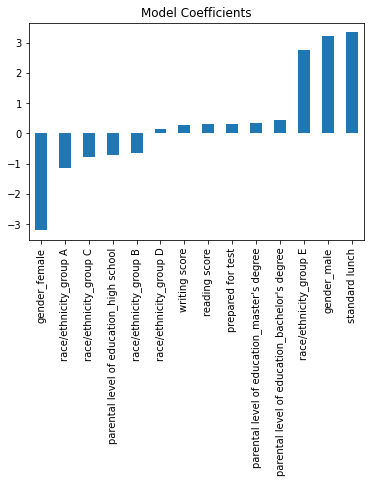

In [93]:
model = Ridge(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 41.20331379181538
CV Score: 41.56689347526068


<AxesSubplot:title={'center':'Model Coefficients'}>

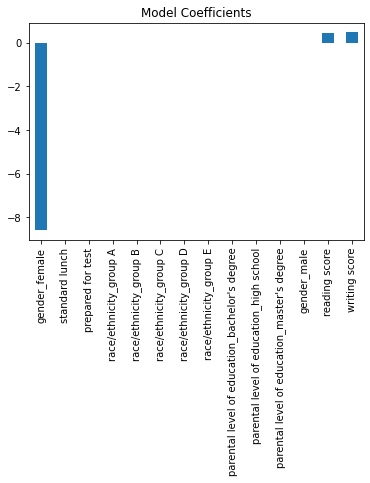

In [94]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.3835
CV Score: 68.67549999999999


<AxesSubplot:title={'center':'Feature Importance'}>

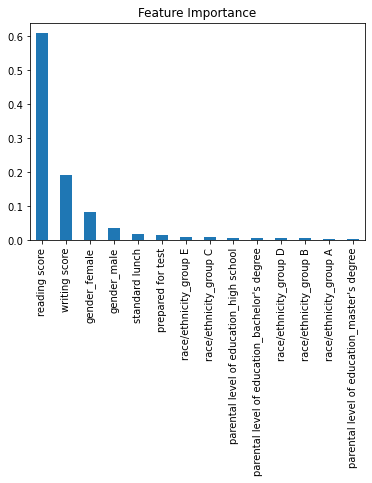

In [95]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 5.5790563291490916
CV Score: 37.949276848040874


<AxesSubplot:title={'center':'Feature Importance'}>

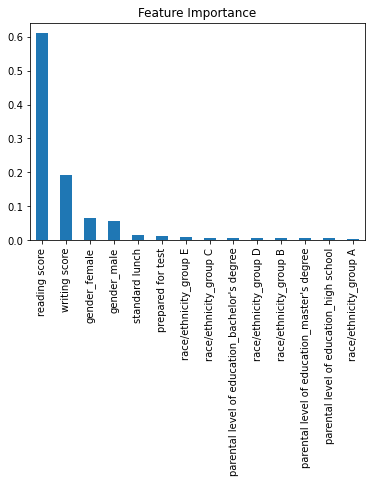

In [96]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 0.38405520000000004
CV Score: 40.312177075


<AxesSubplot:title={'center':'Feature Importance'}>

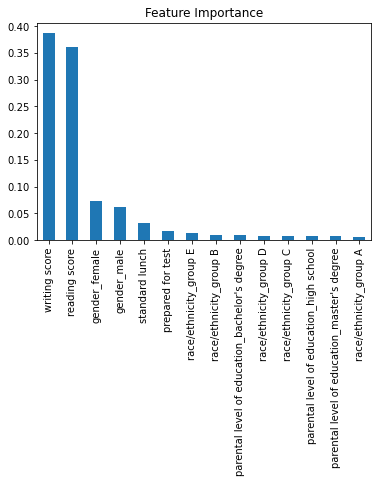

In [97]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [98]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression()

In [99]:
print(regressor.intercept_)

[ 0.06034968  0.04724523  0.03811862  0.03108783  0.0243738   0.03386602
  0.06922179  0.0496946   0.0477998   0.0462236   0.06424656  0.02428642
  0.10501344  0.05755726  0.07059514  0.0252407   0.05000907  0.13081634
  0.09660248  0.05942855  0.05710746  0.11885309  0.12917404  0.14920162
  0.13430426  0.11651996  0.26415196  0.14987413  0.15924878  0.13270648
  0.34421037  0.14087197  0.16459645  0.02950894  0.1291337   0.19258429
  0.19759006  0.06523736  0.16867885  0.21056993  0.04901985  0.05857616
 -0.05645245  0.00372    -0.0698281   0.00198924 -0.01431041 -0.03049836
 -0.02277856 -0.02806791 -0.10997683 -0.12571715 -0.15465018 -0.11512348
 -0.19399859 -0.16209181 -0.1653468  -0.15318325 -0.18107787 -0.21558491
 -0.11666034 -0.15404213 -0.23425186 -0.10539718 -0.2673475  -0.20995287
 -0.13210987 -0.12253101 -0.17026659 -0.14077    -0.07401119 -0.13435161
 -0.05590053 -0.07755183 -0.1256678  -0.09607055 -0.0789335  -0.20470283]


In [100]:
y_pred = regressor.predict(X_test)

In [101]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [102]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 11.545
Mean Squared Error: 216.425
Root Mean Squared Error: 14.711390145054274


In [104]:
df_pred.to_csv('prediction.csv')

In [108]:
for i,v in enumerate(df_pred['Actual']):
    print(v, df_pred.iloc[i, 1])

62 65
87 62
40 63
77 69
69 65
78 62
67 63
46 62
99 73
46 62
54 63
53 65
91 65
84 62
48 58
33 59
57 72
81 65
50 63
80 81
63 65
52 65
73 65
66 62
55 61
68 73
65 81
60 72
53 49
69 65
71 65
93 63
82 65
48 59
52 65
92 63
92 69
69 73
57 65
69 59
76 69
62 62
71 49
57 65
71 69
52 65
77 65
59 58
77 85
44 65
47 62
67 61
44 59
61 62
39 80
63 77
47 78
69 62
81 72
56 65
68 61
74 59
42 65
69 73
63 62
59 73
76 69
47 59
60 65
61 62
81 81
90 49
80 62
58 65
64 80
71 80
73 69
70 69
29 59
73 59
79 62
79 65
64 65
79 62
70 81
77 65
63 61
94 77
59 69
43 65
65 65
54 59
54 65
73 61
86 62
70 62
63 62
52 65
61 73
70 62
32 49
90 80
67 62
34 49
83 63
67 65
63 65
52 65
45 59
87 73
63 65
73 85
26 78
54 49
62 73
67 62
78 73
79 49
79 75
54 59
46 65
67 74
88 65
82 62
79 87
40 65
74 69
70 69
77 69
61 73
68 69
67 69
30 48
81 69
77 65
61 77
67 78
64 74
62 65
81 69
68 75
60 59
71 69
68 73
65 65
41 49
38 59
48 49
71 65
97 73
58 49
69 69
88 59
70 81
64 65
86 73
53 80
52 58
53 49
59 49
81 59
40 49
53 48
97 62
65 78
71 65
67 7

In [110]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.04490965641901912